In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

%matplotlib inline

In [2]:
import pandas as pd
train=pd.read_csv("../input/mnist_train.csv")

In [3]:
test=pd.read_csv("../input/mnist_test.csv")

In [4]:
images = train.iloc[0:60000,1:]
labels = train.iloc[0:60000,:1]

In [5]:
test_images = test.iloc[0:5000,1:]
test_labels = test.iloc[0:5000,:1]

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logisticRegr = LogisticRegression()

In [10]:
import timeit
import time
start=time.clock()
logisticRegr.fit(x_train, y_train)
end=time.clock()
cpu_time=end-start
print("CPU calculating time:",cpu_time) 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU calculating time: 2769.949924


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
predictions = logisticRegr.predict(x_test)

In [13]:
#validation/train accuracy
score = logisticRegr.score(x_test, y_test)
print("train accuracy accuracy:"),score

train accuracy:


(None, 0.9123333333333333)

In [14]:
train_error=(1-score)
print("train Error:"),train_error

Train Error:


(None, 0.08766666666666667)

In [19]:
predictions = logisticRegr.predict(test_images)
score = logisticRegr.score(test_images, test_labels)
print("Test accuracy:"),score



Test accuracy:


(None, 0.8944)

In [20]:
test_error=(1-score)
print("Test Error:"),test_error


Test Error:


(None, 0.10560000000000003)

[[447   0   1   1   1   3   2   0   3   2]
 [  0 561   2   3   0   0   2   1   2   0]
 [  5   8 446  15   5   3   7  11  29   1]
 [  2   2   6 448   0  15   2  11  10   4]
 [  0   3   3   3 452   0   7   2   5  25]
 [  7   1   1  21   6 381   4   6  21   8]
 [  7   3   7   0   4  13 423   0   5   0]
 [  2   8  14   6   3   1   1 444   7  26]
 [  8   7   6  16  11  11   3   7 417   3]
 [  3   6   2   9  25   4   0  12   6 453]]


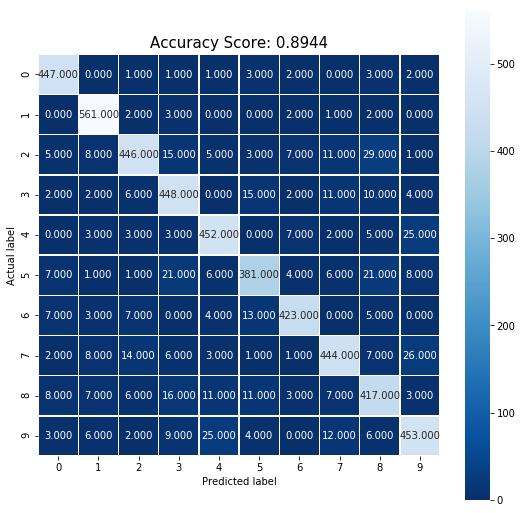

In [21]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(test_labels, predictions)
print(cm) 

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
